# COMPLETE MICROBIOME DIVERSITY PROJECT

## GENERATE A REALISTIC MICROBIOME DATASET

## Import Libraries

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy
from scipy.spatial.distance import pdist, squareform
from scipy.stats import kruskal

from sklearn.decomposition import PCA

from skbio import TreeNode
from skbio.diversity import alpha_diversity, beta_diversity
from skbio.stats.ordination import pcoa

### STEP 1: GENERATE A REALISTIC MICROBIOME DATASET

What this simulates

300 OTUs

60 samples

4 environments

Environment-specific diversity

### DATA GENERATION

STEP 2: LOAD DATA SAFELY 

In [6]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Parameters
n_otus = 300
n_samples = 60
environments = ["Soil", "Water", "Animal", "Human"]

# Assign environments
metadata = pd.DataFrame({
    "SampleID": [f"S{i+1}" for i in range(n_samples)],
    "Environment": np.repeat(environments, n_samples // len(environments))
}).set_index("SampleID")

# Simulate OTU abundances
otu_data = {}

for sample in metadata.index:
    env = metadata.loc[sample, "Environment"]
    
    if env == "Soil":
        counts = np.random.negative_binomial(5, 0.3, n_otus)
    elif env == "Water":
        counts = np.random.negative_binomial(3, 0.4, n_otus)
    elif env == "Animal":
        counts = np.random.negative_binomial(4, 0.35, n_otus)
    else:  # Human
        counts = np.random.negative_binomial(6, 0.25, n_otus)
    
    otu_data[sample] = counts

otu_table = pd.DataFrame(otu_data, index=[f"OTU_{i+1}" for i in range(n_otus)])

otu_table.shape, metadata.shape


((300, 60), (60, 1))

### STEP 2: FILTER & NORMALIZE (STANDARD PRACTICE)

In [7]:
# Remove OTUs with very low abundance
otu_table = otu_table.loc[otu_table.sum(axis=1) > 10]

# Relative abundance normalization
otu_rel = otu_table.div(otu_table.sum(axis=0), axis=1)

### STEP 3: ALPHA DIVERSITY (CORE MICROBIOLOGY)

In [8]:
from scipy.stats import entropy

def shannon(counts):
    counts = counts[counts > 0]
    return entropy(counts)

alpha_div = pd.DataFrame({
    "Shannon": otu_table.apply(shannon, axis=0)
})

alpha_div = alpha_div.join(metadata)
alpha_div.head()


,Shannon,Environment
S1,5.570809,Soil
S2,5.558607,Soil
S3,5.572744,Soil
S4,5.570099,Soil
S5,5.543330,Soil


### STEP 4: VISUALIZE ALPHA DIVERSITY

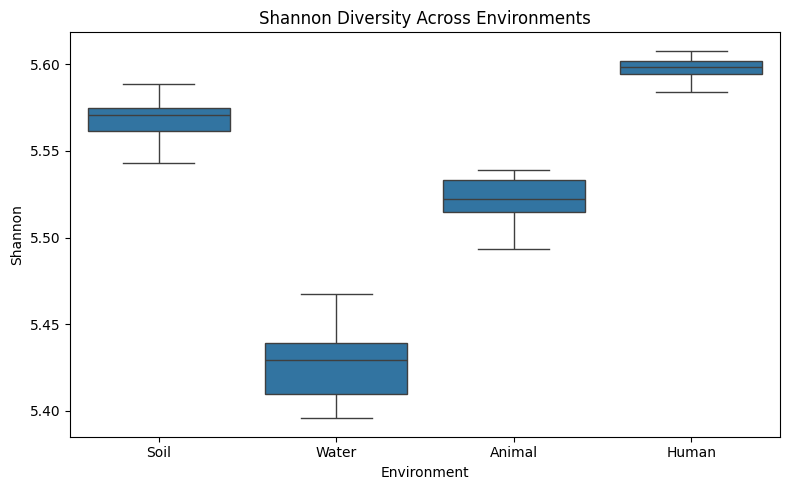

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    x="Environment",
    y="Shannon",
    data=alpha_div
)
plt.title("Shannon Diversity Across Environments")
plt.tight_layout()
plt.show()


### STEP 5: STATISTICAL TESTING

In [10]:
from scipy.stats import kruskal

groups = [
    alpha_div[alpha_div["Environment"] == env]["Shannon"]
    for env in alpha_div["Environment"].unique()
]

stat, p = kruskal(*groups)
p

np.float64(6.432243626953599e-12)

### STEP 6: BETA DIVERSITY (BRAY–CURTIS)

In [13]:
from scipy.spatial.distance import pdist, squareform

bc_dist = squareform(
    pdist(otu_rel.T, metric="braycurtis")
)

bc_df = pd.DataFrame(
    bc_dist,
    index=otu_rel.columns,
    columns=otu_rel.columns
)

### STEP 7: ORDINATION (PCA)

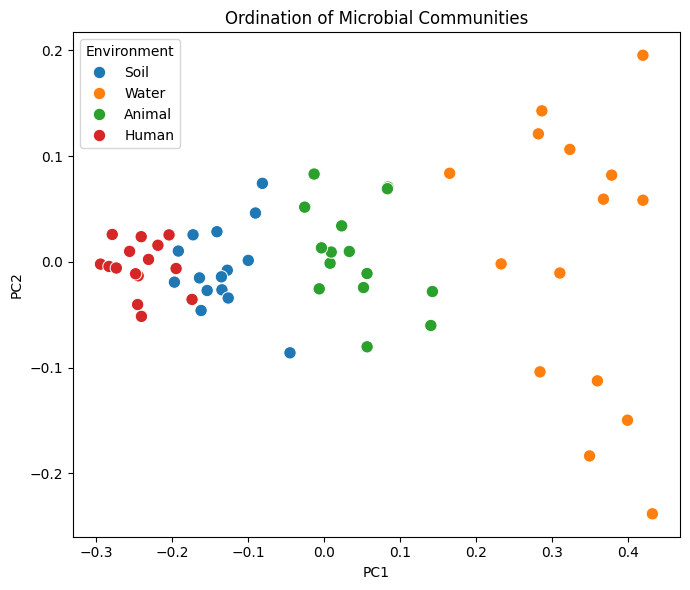

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
coords = pca.fit_transform(bc_df)

pca_df = pd.DataFrame(
    coords,
    columns=["PC1", "PC2"],
    index=otu_rel.columns
).join(metadata)

plt.figure(figsize=(7,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Environment",
    data=pca_df,
    s=80
)
plt.title("Ordination of Microbial Communities")
plt.tight_layout()
plt.show()


In [61]:
# Remove OTUs with very low abundance
otu_table = otu_table.loc[otu_table.sum(axis=1) > 10]

# Relative abundance normalization
otu_rel = otu_table.div(otu_table.sum(axis=0), axis=1)


In [62]:
from scipy.stats import entropy

def shannon(counts):
    counts = counts[counts > 0]
    return entropy(counts)

alpha_div = pd.DataFrame({
    "Shannon": otu_table.apply(shannon, axis=0)
})

alpha_div = alpha_div.join(metadata)
alpha_div.head()


,Shannon,Environment
S1,5.570809,Soil
S2,5.558607,Soil
S3,5.572744,Soil
S4,5.570099,Soil
S5,5.543330,Soil


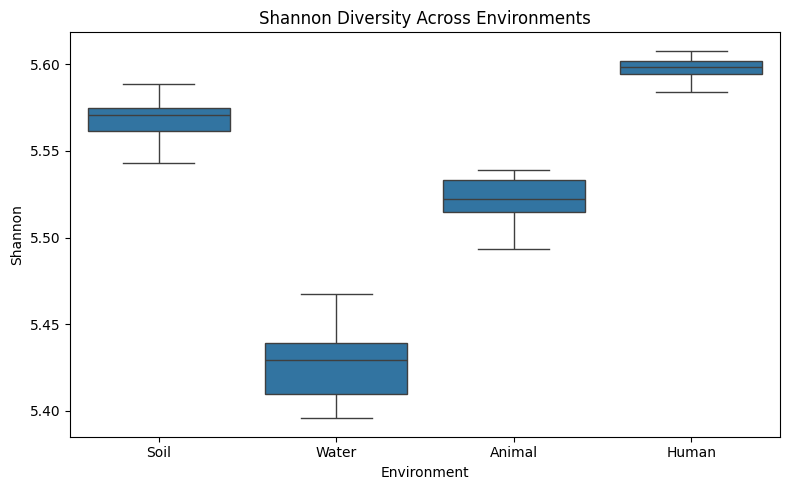

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    x="Environment",
    y="Shannon",
    data=alpha_div
)
plt.title("Shannon Diversity Across Environments")
plt.tight_layout()
plt.show()


In [64]:
from scipy.stats import kruskal

groups = [
    alpha_div[alpha_div["Environment"] == env]["Shannon"]
    for env in alpha_div["Environment"].unique()
]

stat, p = kruskal(*groups)
p


np.float64(6.432243626953599e-12)

In [65]:
import numpy as np
import pandas as pd

phyla = [
    "Proteobacteria",
    "Firmicutes",
    "Bacteroidota",
    "Actinobacteriota",
    "Acidobacteriota",
    "Cyanobacteria"
]

genera = {
    "Proteobacteria": ["Pseudomonas", "Escherichia", "Rhizobium"],
    "Firmicutes": ["Bacillus", "Clostridium", "Lactobacillus"],
    "Bacteroidota": ["Bacteroides", "Prevotella"],
    "Actinobacteriota": ["Streptomyces", "Corynebacterium"],
    "Acidobacteriota": ["Acidobacterium"],
    "Cyanobacteria": ["Synechococcus"]
}


In [66]:
taxonomy = []

for otu in otu_table.index:
    phylum = np.random.choice(phyla, p=[0.25, 0.25, 0.2, 0.15, 0.1, 0.05])
    genus = np.random.choice(genera[phylum])
    
    taxonomy.append({
        "OTU": otu,
        "Phylum": phylum,
        "Genus": genus
    })

taxonomy_df = pd.DataFrame(taxonomy).set_index("OTU")
taxonomy_df.head()


,Phylum,Genus
OTU,,
OTU_1,Firmicutes,Clostridium
OTU_2,Cyanobacteria,Synechococcus
OTU_3,Actinobacteriota,Corynebacterium
OTU_4,Proteobacteria,Escherichia
OTU_5,Firmicutes,Bacillus


In [67]:
otu_tax = otu_table.join(taxonomy_df)

In [69]:
# Fix KeyError by ensuring OTU is a column before melting
otu_tax_reset = otu_tax.reset_index()
if 'OTU' not in otu_tax_reset.columns:
    otu_tax_reset = otu_tax_reset.rename(columns={otu_tax_reset.columns[0]: 'OTU'})

otu_long = otu_tax_reset.melt(
    id_vars=["OTU", "Phylum", "Genus"],
    var_name="SampleID",
    value_name="Count"
)

otu_long = otu_long.merge(metadata, on="SampleID")
otu_long.head()

,OTU,Phylum,Genus,SampleID,Count,Environment
0,OTU_1,Firmicutes,Clostridium,S1,15,Soil
1,OTU_2,Cyanobacteria,Synechococcus,S1,11,Soil
2,OTU_3,Actinobacteriota,Corynebacterium,S1,7,Soil
3,OTU_4,Proteobacteria,Escherichia,S1,13,Soil
4,OTU_5,Firmicutes,Bacillus,S1,7,Soil


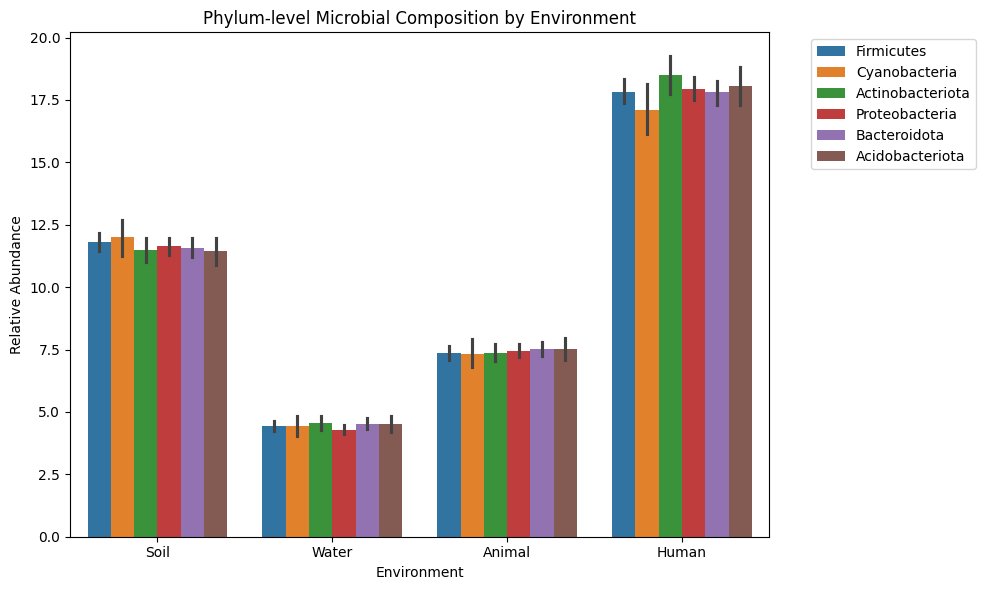

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=otu_long,
    x="Environment",
    y="Count",
    hue="Phylum"
)
plt.ylabel("Relative Abundance")
plt.title("Phylum-level Microbial Composition by Environment")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [73]:
amr_genes = [
    "blaTEM",     # beta-lactam
    "tetM",       # tetracycline
    "ermB",       # macrolide
    "sul1",       # sulfonamide
    "vanA",       # vancomycin
    "mcr-1"       # colistin
]

In [74]:
amr_assignment = {}

for otu in otu_table.index:
    phylum = taxonomy_df.loc[otu, "Phylum"]
    
    if phylum in ["Proteobacteria", "Firmicutes"]:
        genes = np.random.choice(amr_genes, size=np.random.randint(0, 3), replace=False)
    else:
        genes = np.random.choice(amr_genes, size=np.random.randint(0, 1), replace=False)
    
    amr_assignment[otu] = list(genes)


In [75]:
amr_counts = pd.DataFrame(0, index=metadata.index, columns=amr_genes)

for sample in otu_table.columns:
    for otu, count in otu_table[sample].items():
        for gene in amr_assignment[otu]:
            amr_counts.loc[sample, gene] += count


In [76]:
amr_rel = amr_counts.div(amr_counts.sum(axis=1), axis=0)
amr_rel = amr_rel.join(metadata)

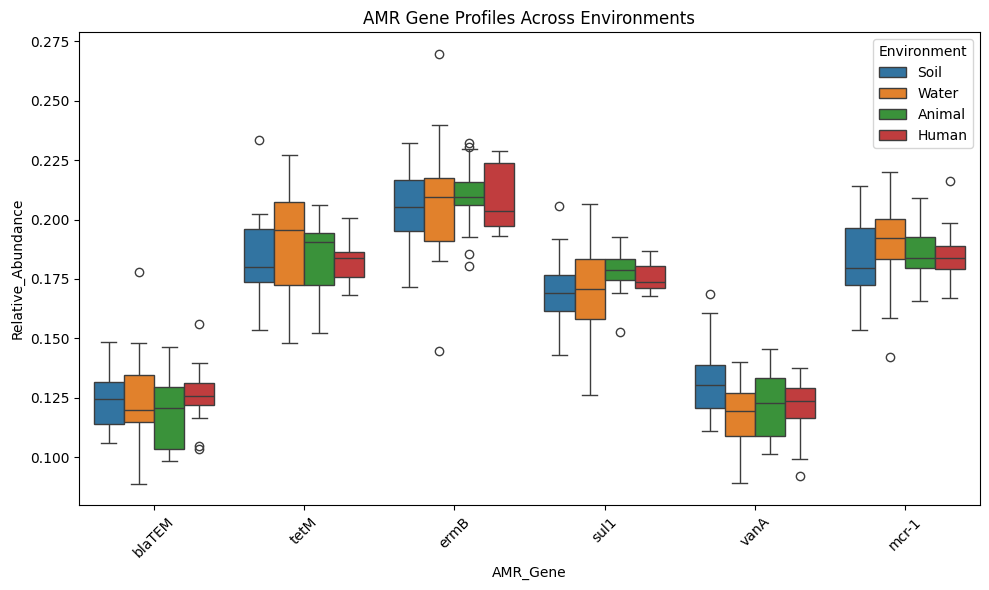

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=amr_rel.melt(
        id_vars="Environment",
        value_vars=amr_genes,
        var_name="AMR_Gene",
        value_name="Relative_Abundance"
    ),
    x="AMR_Gene",
    y="Relative_Abundance",
    hue="Environment"
)
plt.xticks(rotation=45)
plt.title("AMR Gene Profiles Across Environments")
plt.tight_layout()
plt.show()
